## Ch9 데이터 수집과 그룹연산

### 9.1 groupby

In [1]:
import numpy as np
import pandas as pd

df=pd.DataFrame({'key1':['a','a','b','b','a'],
             'key2':['one','two','one','two','one'],
             'data1': np.random.randn(5),
             'data2':np.random.rand(5)})
df

,key1,key2,data1,data2
0,a,one,0.069834,0.744072
1,a,two,0.110756,0.253855
2,b,one,-0.056116,0.401759
3,b,two,-0.459338,0.248673
4,a,one,-0.379762,0.292228


In [2]:
grouped=df['data1'].groupby(df['key1']) 
# 데이터를 key1로 묶고 각 그룹에서 data1의 평균 구하기
grouped.mean()

key1
a   -0.066391
b   -0.257727
Name: data1, dtype: float64

In [3]:
means=df['data1'].groupby([df['key1'], df['key2']]).mean()
means

key1  key2
a     one    -0.154964
      two     0.110756
b     one    -0.056116
      two    -0.459338
Name: data1, dtype: float64

In [4]:
means.unstack()

key2,one,two
key1,,
a,-0.154964,0.110756
b,-0.056116,-0.459338


In [5]:
states=np.array(['Ohio','Cal','Cal','Ohio','Ohio'])
print(states)

years=np.array([2005,2005,2006,2005,2006])

['Ohio' 'Cal' 'Cal' 'Ohio' 'Ohio']


In [6]:
df['data1']

0    0.069834
1    0.110756
2   -0.056116
3   -0.459338
4   -0.379762
Name: data1, dtype: float64

In [7]:
df['data1'].groupby([states, years]).mean()

Cal   2005    0.110756
      2006   -0.056116
Ohio  2005   -0.194752
      2006   -0.379762
Name: data1, dtype: float64

In [8]:
df.groupby('key1').mean()

,data1,data2
key1,,
a,-0.066391,0.430052
b,-0.257727,0.325216


In [9]:
df.groupby(['key1','key2']).mean()

data1     data2
key1 key2                    
a    one  -0.154964  0.518150
     two   0.110756  0.253855
b    one  -0.056116  0.401759
     two  -0.459338  0.248673

In [10]:
df.groupby(['key1','key2']).size() # size 크기를 담는 방법

key1  key2
a     one     2
      two     1
b     one     1
      two     1
dtype: int64

#### 9.11 그룹 간 순회하기

In [11]:
df

,key1,key2,data1,data2
0,a,one,0.069834,0.744072
1,a,two,0.110756,0.253855
2,b,one,-0.056116,0.401759
3,b,two,-0.459338,0.248673
4,a,one,-0.379762,0.292228


In [12]:
for name, group in df.groupby('key1'):
    print(name)
    print(group)

a
  key1 key2     data1     data2
0    a  one  0.069834  0.744072
1    a  two  0.110756  0.253855
4    a  one -0.379762  0.292228
b
  key1 key2     data1     data2
2    b  one -0.056116  0.401759
3    b  two -0.459338  0.248673


In [13]:
for (k1,k2),group in df.groupby(['key1','key2']):
    print((k1,k2))
    print(group)

('a', 'one')
  key1 key2     data1     data2
0    a  one  0.069834  0.744072
4    a  one -0.379762  0.292228
('a', 'two')
  key1 key2     data1     data2
1    a  two  0.110756  0.253855
('b', 'one')
  key1 key2     data1     data2
2    b  one -0.056116  0.401759
('b', 'two')
  key1 key2     data1     data2
3    b  two -0.459338  0.248673


In [14]:
pieces=dict(list(df.groupby('key1')))
pieces['b']

,key1,key2,data1,data2
2,b,one,-0.056116,0.401759
3,b,two,-0.459338,0.248673


In [15]:
dict(list(df.groupby('key1')))

{'a':   key1 key2     data1     data2
 0    a  one  0.069834  0.744072
 1    a  two  0.110756  0.253855
 4    a  one -0.379762  0.292228,
 'b':   key1 key2     data1     data2
 2    b  one -0.056116  0.401759
 3    b  two -0.459338  0.248673}

In [16]:
list(df.groupby('key1'))

[('a',
    key1 key2     data1     data2
  0    a  one  0.069834  0.744072
  1    a  two  0.110756  0.253855
  4    a  one -0.379762  0.292228),
 ('b',
    key1 key2     data1     data2
  2    b  one -0.056116  0.401759
  3    b  two -0.459338  0.248673)]

#### 9.1.2 칼럼 또는 칼럼의 일부만 선택하기

In [17]:
df.groupby('key1')['data1']
df.groupby('key1')[['data1']]
# 1. 칼럼 이름으로 접근한 경우, 2. 칼럼 이름이 담긴 배열로 접근하기
# 둘의 차이

In [18]:
df.groupby(['key1','key2'])[['data2']].mean()
# 특정 열에 대해서만 평균을 구하고 싶은 경우

data2
key1 key2          
a    one   0.518150
     two   0.253855
b    one   0.401759
     two   0.248673

In [19]:
s_grouped = df.groupby(['key1','key2'])['data2']
s_grouped.mean()

key1  key2
a     one     0.518150
      two     0.253855
b     one     0.401759
      two     0.248673
Name: data2, dtype: float64

#### 9.1.3 사전과 series에서 묶기

In [20]:
import numpy as np
import pandas as pd

people=pd.DataFrame(np.random.randn(5,5),
                   columns=['a','b','c','d','e'],
                   index=['Joe','Steve','Wes','Jin','Travis'])
people.loc[2:3,['b','c']]=np.nan # 특정 위치에 NaN 값 추가하기
people

/tmp/ipykernel_540369/917422282.py:7: FutureWarning: Slicing a positional slice with .loc is not supported, and will raise TypeError in a future version.  Use .loc with labels or .iloc with positions instead.
  people.loc[2:3,['b','c']]=np.nan # 특정 위치에 NaN 값 추가하기


,a,b,c,d,e
Joe,-1.753170,-1.308720,-0.029869,-1.256723,-0.408946
Steve,0.543595,-2.216548,0.348483,-0.923047,-1.213559
Wes,-1.445518,NaN,NaN,-0.695572,0.341628
Jin,0.797632,0.012910,-0.832106,1.206049,0.447079
Travis,0.481866,-1.506243,0.377567,-0.023316,-0.983813


In [21]:
mapping={'a':'Red','b':'Red','c':'Blue',
        'd':'Blue','e':'Red','f':'Orange'} # 그러면 우리도, main_BD2:main, 이런식으로 mapping 만들면 구해지려나???

In [22]:
by_column=people.groupby(mapping, axis=1)
by_column.sum()

,Blue,Red
Joe,-1.286591,-3.470835
Steve,-0.574564,-2.886513
Wes,-0.695572,-1.103890
Jin,0.373943,1.257621
Travis,0.354251,-2.008190


In [23]:
from pandas import Series, DataFrame

map_series = Series(mapping) # NameError: name 'Series' is not defined
map_series

a       Red
b       Red
c      Blue
d      Blue
e       Red
f    Orange
dtype: object

In [24]:
people.groupby(map_series, axis=1).count()

,Blue,Red
Joe,2,3
Steve,2,3
Wes,1,2
Jin,2,3
Travis,2,3


#### 9.1.4 함수로 묶기

In [25]:
people.groupby(len).sum() # 이름의 길이별로 그룹을 묶고 싶은 경우

,a,b,c,d,e
3,-2.401055,-1.295810,-0.861974,-0.746246,0.379760
5,0.543595,-2.216548,0.348483,-0.923047,-1.213559
6,0.481866,-1.506243,0.377567,-0.023316,-0.983813


In [26]:
key_list=['one','one','one','two','two']
people.groupby([len, key_list]).min()

a         b         c         d         e
3 one -1.753170 -1.308720 -0.029869 -1.256723 -0.408946
  two  0.797632  0.012910 -0.832106  1.206049  0.447079
5 one  0.543595 -2.216548  0.348483 -0.923047 -1.213559
6 two  0.481866 -1.506243  0.377567 -0.023316 -0.983813

#### 9.1.5 색인 단계로 묶기

In [27]:
columns = pd.MultiIndex.from_arrays([['US','US','US','JP','JP'],
                                    [1,3,5,1,3]], names=['cty','tenor'])
columns

MultiIndex([('US', 1),
            ('US', 3),
            ('US', 5),
            ('JP', 1),
            ('JP', 3)],
           names=['cty', 'tenor'])

In [28]:
hier_df = pd.DataFrame(np.random.randn(4,5), columns=columns)
hier_df

cty          US                            JP          
tenor         1         3         5         1         3
0      1.045218 -1.267385 -0.347295  0.023622  0.463762
1     -1.280669  0.233326  0.657413  0.474175  0.072397
2      1.523019  1.392947  0.321422  2.262417  0.750701
3     -0.187617  0.623143 -0.578310  1.344514  1.373613

In [29]:
hier_df.groupby(level='cty', axis=1).count()

cty,JP,US
0,2,3
1,2,3
2,2,3
3,2,3


### 9.2 데이터 수집

In [30]:
df

,key1,key2,data1,data2
0,a,one,0.069834,0.744072
1,a,two,0.110756,0.253855
2,b,one,-0.056116,0.401759
3,b,two,-0.459338,0.248673
4,a,one,-0.379762,0.292228


In [31]:
grouped=df.groupby('key1')
grouped

In [32]:
grouped['data1'].quantile(0.9)

key1
a    0.102572
b   -0.096438
Name: data1, dtype: float64

In [33]:
# 나만의 데이터 집계함수 만들어서 사용하기 -> 배열의 agg, aggregate 메서드에 해당 함수 넘기기
def peak_to_peak(arr):
    return arr.max()-arr.min()

grouped.agg(peak_to_peak)

/tmp/ipykernel_540369/2823828434.py:5: FutureWarning: ['key2'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  grouped.agg(peak_to_peak)


,data1,data2
key1,,
a,0.490518,0.490218
b,0.403222,0.153087


In [34]:
grouped.describe() # 데이터 집계 방법/

data1                                                              \
     count      mean       std       min       25%       50%       75%   
key1                                                                     
a      3.0 -0.066391  0.272158 -0.379762 -0.154964  0.069834  0.090295   
b      2.0 -0.257727  0.285121 -0.459338 -0.358533 -0.257727 -0.156922   

               data2                                                    \
           max count      mean       std       min       25%       50%   
key1                                                                     
a     0.110756   3.0  0.430052  0.272626  0.253855  0.273041  0.292228   
b    -0.056116   2.0  0.325216  0.108249  0.248673  0.286944  0.325216   

                          
           75%       max  
key1                      
a     0.518150  0.744072  
b     0.363487  0.401759

In [36]:
import pandas as pd

tips = pd.read_csv('pydata-book/examples/tips.csv')
tips['tip_pct'] = tips['tip']/tips['total_bill']
tips[:6]

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.059447
1,10.34,1.66,No,Sun,Dinner,3,0.160542
2,21.01,3.50,No,Sun,Dinner,3,0.166587
3,23.68,3.31,No,Sun,Dinner,2,0.139780
4,24.59,3.61,No,Sun,Dinner,4,0.146808
5,25.29,4.71,No,Sun,Dinner,4,0.186240


#### 9.2.1 칼럼에 여러 가지 함수 적용하기

In [37]:
grouped = tips.groupby(['day','smoker'])
grouped

In [38]:
grouped_pct = grouped['tip_pct']
grouped_pct.agg('mean')

day   smoker
Fri   No        0.151650
      Yes       0.174783
Sat   No        0.158048
      Yes       0.147906
Sun   No        0.160113
      Yes       0.187250
Thur  No        0.160298
      Yes       0.163863
Name: tip_pct, dtype: float64

In [39]:
grouped_pct.agg(['mean','std',peak_to_peak])

mean       std  peak_to_peak
day  smoker                                  
Fri  No      0.151650  0.028123      0.067349
     Yes     0.174783  0.051293      0.159925
Sat  No      0.158048  0.039767      0.235193
     Yes     0.147906  0.061375      0.290095
Sun  No      0.160113  0.042347      0.193226
     Yes     0.187250  0.154134      0.644685
Thur No      0.160298  0.038774      0.193350
     Yes     0.163863  0.039389      0.151240

In [40]:
grouped_pct.agg([('foo','mean'),('bar',np.std)])
# foo와 bar라는 이름으로 mean과 np.std가 계산됨

foo       bar
day  smoker                    
Fri  No      0.151650  0.028123
     Yes     0.174783  0.051293
Sat  No      0.158048  0.039767
     Yes     0.147906  0.061375
Sun  No      0.160113  0.042347
     Yes     0.187250  0.154134
Thur No      0.160298  0.038774
     Yes     0.163863  0.039389

In [41]:
functions = ['count', 'mean', 'max']
result = grouped['tip_pct', 'total_bill'].agg(functions)
result

/tmp/ipykernel_540369/576261660.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  result = grouped['tip_pct', 'total_bill'].agg(functions)


tip_pct                     total_bill                  
              count      mean       max      count       mean    max
day  smoker                                                         
Fri  No           4  0.151650  0.187735          4  18.420000  22.75
     Yes         15  0.174783  0.263480         15  16.813333  40.17
Sat  No          45  0.158048  0.291990         45  19.661778  48.33
     Yes         42  0.147906  0.325733         42  21.276667  50.81
Sun  No          57  0.160113  0.252672         57  20.506667  48.17
     Yes         19  0.187250  0.710345         19  24.120000  45.35
Thur No          45  0.160298  0.266312         45  17.113111  41.19
     Yes         17  0.163863  0.241255         17  19.190588  43.11

In [42]:
result['tip_pct'] # 일부만 보기

count      mean       max
day  smoker                           
Fri  No          4  0.151650  0.187735
     Yes        15  0.174783  0.263480
Sat  No         45  0.158048  0.291990
     Yes        42  0.147906  0.325733
Sun  No         57  0.160113  0.252672
     Yes        19  0.187250  0.710345
Thur No         45  0.160298  0.266312
     Yes        17  0.163863  0.241255

In [43]:
ftuples = [('Durchschnitt', 'mean'), ('Abweichung', np.var)]
ftuples

[('Durchschnitt', 'mean'),
 ('Abweichung',
  <function numpy.var(a, axis=None, dtype=None, out=None, ddof=0, keepdims=<no value>, *, where=<no value>)>)]

In [44]:
grouped['tip_pct', 'total_bill'].agg(ftuples)

/tmp/ipykernel_540369/514018043.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  grouped['tip_pct', 'total_bill'].agg(ftuples)


tip_pct              total_bill            
            Durchschnitt Abweichung Durchschnitt  Abweichung
day  smoker                                                 
Fri  No         0.151650   0.000791    18.420000   25.596333
     Yes        0.174783   0.002631    16.813333   82.562438
Sat  No         0.158048   0.001581    19.661778   79.908965
     Yes        0.147906   0.003767    21.276667  101.387535
Sun  No         0.160113   0.001793    20.506667   66.099980
     Yes        0.187250   0.023757    24.120000  109.046044
Thur No         0.160298   0.001503    17.113111   59.625081
     Yes        0.163863   0.001551    19.190588   69.808518

In [45]:
grouped.agg({'tip':np.max, 'size':'sum'})

tip  size
day  smoker             
Fri  No       3.50     9
     Yes      4.73    31
Sat  No       9.00   115
     Yes     10.00   104
Sun  No       6.00   167
     Yes      6.50    49
Thur No       6.70   112
     Yes      5.00    40

In [46]:
grouped.agg({'tip_pct':['min','max','mean','std'],
            'size':'sum'})

tip_pct                               size
                  min       max      mean       std  sum
day  smoker                                             
Fri  No      0.120385  0.187735  0.151650  0.028123    9
     Yes     0.103555  0.263480  0.174783  0.051293   31
Sat  No      0.056797  0.291990  0.158048  0.039767  115
     Yes     0.035638  0.325733  0.147906  0.061375  104
Sun  No      0.059447  0.252672  0.160113  0.042347  167
     Yes     0.065660  0.710345  0.187250  0.154134   49
Thur No      0.072961  0.266312  0.160298  0.038774  112
     Yes     0.090014  0.241255  0.163863  0.039389   40

#### 9.2.2 색인되지 않은 형태로 집계된 데이터 반환하기

In [47]:
tips.groupby(['day','smoker'], as_index=False).mean()

,day,smoker,total_bill,tip,size,tip_pct
0,Fri,No,18.420000,2.812500,2.250000,0.151650
1,Fri,Yes,16.813333,2.714000,2.066667,0.174783
2,Sat,No,19.661778,3.102889,2.555556,0.158048
3,Sat,Yes,21.276667,2.875476,2.476190,0.147906
4,Sun,No,20.506667,3.167895,2.929825,0.160113
5,Sun,Yes,24.120000,3.516842,2.578947,0.187250
6,Thur,No,17.113111,2.673778,2.488889,0.160298
7,Thur,Yes,19.190588,3.030000,2.352941,0.163863


In [48]:
tips.groupby(['day','smoker'], as_index=True).mean()

total_bill       tip      size   tip_pct
day  smoker                                          
Fri  No       18.420000  2.812500  2.250000  0.151650
     Yes      16.813333  2.714000  2.066667  0.174783
Sat  No       19.661778  3.102889  2.555556  0.158048
     Yes      21.276667  2.875476  2.476190  0.147906
Sun  No       20.506667  3.167895  2.929825  0.160113
     Yes      24.120000  3.516842  2.578947  0.187250
Thur No       17.113111  2.673778  2.488889  0.160298
     Yes      19.190588  3.030000  2.352941  0.163863

### 9.3 그룹별 연산과 변형

In [49]:
df

,key1,key2,data1,data2
0,a,one,0.069834,0.744072
1,a,two,0.110756,0.253855
2,b,one,-0.056116,0.401759
3,b,two,-0.459338,0.248673
4,a,one,-0.379762,0.292228


In [50]:
k1_means = df.groupby('key1').mean().add_prefix('mean_')
k1_means

,mean_data1,mean_data2
key1,,
a,-0.066391,0.430052
b,-0.257727,0.325216


In [51]:
pd.merge(df, k1_means, left_on='key1', right_index=True)

,key1,key2,data1,data2,mean_data1,mean_data2
0,a,one,0.069834,0.744072,-0.066391,0.430052
1,a,two,0.110756,0.253855,-0.066391,0.430052
4,a,one,-0.379762,0.292228,-0.066391,0.430052
2,b,one,-0.056116,0.401759,-0.257727,0.325216
3,b,two,-0.459338,0.248673,-0.257727,0.325216


In [52]:
key = ['one', 'two', 'one', 'two', 'one']
people.groupby(key).mean()

,a,b,c,d,e
one,-0.905607,-1.407481,0.173849,-0.658537,-0.350377
two,0.670613,-1.101819,-0.241811,0.141501,-0.383240


In [53]:
people.groupby(key).transform(np.mean)

,a,b,c,d,e
Joe,-0.905607,-1.407481,0.173849,-0.658537,-0.350377
Steve,0.670613,-1.101819,-0.241811,0.141501,-0.383240
Wes,-0.905607,-1.407481,0.173849,-0.658537,-0.350377
Jin,0.670613,-1.101819,-0.241811,0.141501,-0.383240
Travis,-0.905607,-1.407481,0.173849,-0.658537,-0.350377


In [54]:
def demean(arr):
    return arr - arr.mean()

demeaned = people.groupby(key).transform(demean)
demeaned

,a,b,c,d,e
Joe,-0.847562,0.098761,-0.203718,-0.598186,-0.058569
Steve,-0.127019,-1.114729,0.590294,-1.064548,-0.830319
Wes,-0.539911,NaN,NaN,-0.037035,0.692005
Jin,0.127019,1.114729,-0.590294,1.064548,0.830319
Travis,1.387473,-0.098761,0.203718,0.635221,-0.633436


In [55]:
demeaned.groupby(key).mean()

,a,b,c,d,e
one,0.000000e+00,-1.110223e-16,-1.387779e-17,-7.401487e-17,-7.401487e-17
two,-5.551115e-17,0.000000e+00,0.000000e+00,0.000000e+00,-5.551115e-17


#### 9.3.1 apply: 분리, 적용, 병합

In [56]:
def top(df, n=5, column='tip_pct'):
    return df.sort_values(by=column)[-n:] 

# 팁 데이터에서 그룹별 상위 5개의 tip_pct 값 고르기

top(tips, n=6)

,total_bill,tip,smoker,day,time,size,tip_pct
109,14.31,4.00,Yes,Sat,Dinner,2,0.279525
183,23.17,6.50,Yes,Sun,Dinner,4,0.280535
232,11.61,3.39,No,Sat,Dinner,2,0.291990
67,3.07,1.00,Yes,Sat,Dinner,1,0.325733
178,9.60,4.00,Yes,Sun,Dinner,2,0.416667
172,7.25,5.15,Yes,Sun,Dinner,2,0.710345


In [57]:
tips.groupby('smoker').apply(top)

total_bill   tip smoker   day    time  size   tip_pct
smoker                                                           
No     88        24.71  5.85     No  Thur   Lunch     2  0.236746
       185       20.69  5.00     No   Sun  Dinner     5  0.241663
       51        10.29  2.60     No   Sun  Dinner     2  0.252672
       149        7.51  2.00     No  Thur   Lunch     2  0.266312
       232       11.61  3.39     No   Sat  Dinner     2  0.291990
Yes    109       14.31  4.00    Yes   Sat  Dinner     2  0.279525
       183       23.17  6.50    Yes   Sun  Dinner     4  0.280535
       67         3.07  1.00    Yes   Sat  Dinner     1  0.325733
       178        9.60  4.00    Yes   Sun  Dinner     2  0.416667
       172        7.25  5.15    Yes   Sun  Dinner     2  0.710345

In [58]:
tips.groupby(['smoker','day']).apply(top, n=1, column='total_bill')

total_bill    tip smoker   day    time  size   tip_pct
smoker day                                                             
No     Fri  94        22.75   3.25     No   Fri  Dinner     2  0.142857
       Sat  212       48.33   9.00     No   Sat  Dinner     4  0.186220
       Sun  156       48.17   5.00     No   Sun  Dinner     6  0.103799
       Thur 142       41.19   5.00     No  Thur   Lunch     5  0.121389
Yes    Fri  95        40.17   4.73    Yes   Fri  Dinner     4  0.117750
       Sat  170       50.81  10.00    Yes   Sat  Dinner     3  0.196812
       Sun  182       45.35   3.50    Yes   Sun  Dinner     3  0.077178
       Thur 197       43.11   5.00    Yes  Thur   Lunch     4  0.115982

In [59]:
result = tips.groupby('smoker')['tip_pct'].describe()
result

,count,mean,std,min,25%,50%,75%,max
smoker,,,,,,,,
No,151.0,0.159328,0.039910,0.056797,0.136906,0.155625,0.185014,0.291990
Yes,93.0,0.163196,0.085119,0.035638,0.106771,0.153846,0.195059,0.710345


In [60]:
result.unstack('smoker')

       smoker
count  No        151.000000
       Yes        93.000000
mean   No          0.159328
       Yes         0.163196
std    No          0.039910
       Yes         0.085119
min    No          0.056797
       Yes         0.035638
25%    No          0.136906
       Yes         0.106771
50%    No          0.155625
       Yes         0.153846
75%    No          0.185014
       Yes         0.195059
max    No          0.291990
       Yes         0.710345
dtype: float64

#### 그룹 색인 생략하기

In [61]:
tips.groupby('smoker',group_keys=False).apply(top)

,total_bill,tip,smoker,day,time,size,tip_pct
88,24.71,5.85,No,Thur,Lunch,2,0.236746
185,20.69,5.00,No,Sun,Dinner,5,0.241663
51,10.29,2.60,No,Sun,Dinner,2,0.252672
149,7.51,2.00,No,Thur,Lunch,2,0.266312
232,11.61,3.39,No,Sat,Dinner,2,0.291990
109,14.31,4.00,Yes,Sat,Dinner,2,0.279525
183,23.17,6.50,Yes,Sun,Dinner,4,0.280535
67,3.07,1.00,Yes,Sat,Dinner,1,0.325733
178,9.60,4.00,Yes,Sun,Dinner,2,0.416667
172,7.25,5.15,Yes,Sun,Dinner,2,0.710345


#### 9.3.2 변위치 분석과 버킷 분석

판다스로 데이터 나누어주기 (일정 범위를 적용해서)
* 참고: https://steadiness-193.tistory.com/67

In [62]:
frame = pd.DataFrame({'data1':np.random.randn(1000),
                     'data2':np.random.randn(1000)})
print(frame)
factor = pd.cut(frame.data1, 4)
factor

        data1     data2
0   -1.177603 -1.749486
1    0.394719 -0.321987
2    0.357056 -0.138063
3    1.513221  0.366455
4   -0.667141  1.251095
..        ...       ...
995 -0.860567 -0.670516
996  0.903275 -0.619546
997 -0.060578  1.079775
998  1.123281  1.293482
999  0.656334 -0.344418

[1000 rows x 2 columns]


0      (-1.464, 0.15]
1       (0.15, 1.763]
2       (0.15, 1.763]
3       (0.15, 1.763]
4      (-1.464, 0.15]
            ...      
995    (-1.464, 0.15]
996     (0.15, 1.763]
997    (-1.464, 0.15]
998     (0.15, 1.763]
999     (0.15, 1.763]
Name: data1, Length: 1000, dtype: category
Categories (4, interval[float64, right]): [(-3.083, -1.464] < (-1.464, 0.15] < (0.15, 1.763] < (1.763, 3.376]]

In [63]:
def get_stats(group):
    return {'min':group.min(), 'max':group.max(),
           'count':group.count(), 'mean':group.mean()}

grouped = frame.data2.groupby(factor)
grouped.apply(get_stats).unstack()

,min,max,count,mean
data1,,,,
"(-3.083, -1.464]",-2.440979,2.439639,78.0,-0.147703
"(-1.464, 0.15]",-2.764695,3.237410,490.0,0.028978
"(0.15, 1.763]",-2.873525,3.565682,398.0,-0.034157
"(1.763, 3.376]",-1.170453,1.891709,34.0,0.090835


In [64]:
grouping = pd.qcut(frame.data1, 10, labels=False)
grouping

0      1
1      6
2      6
3      9
4      2
      ..
995    2
996    8
997    4
998    8
999    7
Name: data1, Length: 1000, dtype: int64

In [65]:
grouped = frame.data2.groupby(grouping)
grouped.apply(get_stats).unstack()

,min,max,count,mean
data1,,,,
0,-2.440979,2.690496,100.0,-0.094622
1,-2.087556,2.598539,100.0,0.092209
2,-2.705604,3.032359,100.0,0.022988
3,-2.342761,3.237410,100.0,-0.007361
4,-2.723086,2.303024,100.0,-0.058827
5,-2.764695,3.565682,100.0,-0.047264
6,-2.595131,1.970697,100.0,-0.060135
7,-2.418249,2.746932,100.0,0.125311
8,-2.873525,2.492088,100.0,-0.117257


#### 9.3.3 예제: 그룹에 국한된 값으로 누락된 값 채우기

In [66]:
# 누락된 값을 fill na로 대체하는 방법(삭제하지 않고)

s = Series(np.random.randn(6))
s[::2]=np.nan
s

0         NaN
1   -1.273919
2         NaN
3    0.194660
4         NaN
5    1.176181
dtype: float64

In [67]:
s.fillna(s.mean())

0    0.032307
1   -1.273919
2    0.032307
3    0.194660
4    0.032307
5    1.176181
dtype: float64

In [68]:
states = ['Ohio', 'New', 'Ver', 'Flor',
         'Oregeon', 'Nevada', 'Cal', 'Idaho']

group_key = ['East']*4 + ['West']*4

data = Series(np.random.randn(8), index=states)
data[['Ver','Nevada','Idaho']] = np.nan
data

Ohio       0.131279
New        2.563299
Ver             NaN
Flor       0.055632
Oregeon   -0.337136
Nevada          NaN
Cal        0.014679
Idaho           NaN
dtype: float64

In [69]:
data.groupby(group_key).mean()

East    0.916736
West   -0.161228
dtype: float64

In [70]:
fill_mean = lambda g: g.fillna(g.mean())

data.groupby(group_key).apply(fill_mean)
# 누락된 값을 평균으로 채우기

Ohio       0.131279
New        2.563299
Ver        0.916736
Flor       0.055632
Oregeon   -0.337136
Nevada    -0.161228
Cal        0.014679
Idaho     -0.161228
dtype: float64

In [71]:
# 그룹에 따라 미리 정의된 다른 값으로 채우기

fill_values = {'East':0.5, 'West': -1}
fill_func = lambda g:g.fillna(fill_values[g.name])

data.groupby(group_key).apply(fill_func)

Ohio       0.131279
New        2.563299
Ver        0.500000
Flor       0.055632
Oregeon   -0.337136
Nevada    -1.000000
Cal        0.014679
Idaho     -1.000000
dtype: float64

#### 9.3.4 예제: 랜덤 표본과 순열

In [72]:
suits = ['H', 'S', 'C', 'D']
card_val = (list(range(1,11))+[10]*3)*4
base_names = ['A']+list(range(2,11)) + ['J', 'K', 'Q']
cards = []

for suit in ['H', 'S', 'C', 'D']:
    cards.extend(str(num) + suit for num in base_names)

deck = Series(card_val, index=cards)
deck[:13]

AH      1
2H      2
3H      3
4H      4
5H      5
6H      6
7H      7
8H      8
9H      9
10H    10
JH     10
KH     10
QH     10
dtype: int64

In [73]:
def draw(deck, n=5):
    return deck.take(np.random.permutation(len(deck))[:n])

draw(deck)

3H     3
3D     3
5S     5
5D     5
QH    10
dtype: int64

In [74]:
get_suit = lambda card: card[-1]

deck.groupby(get_suit).apply(draw, n=2)

C  7C     7
   AC     1
D  7D     7
   KD    10
H  4H     4
   QH    10
S  QS    10
   JS    10
dtype: int64

In [75]:
deck.groupby(get_suit, group_keys=False).apply(draw, n=2)

AC     1
KC    10
AD     1
2D     2
5H     5
9H     9
7S     7
4S     4
dtype: int64

#### 9.3.5 예제: 그룹 가중 평균과 상관관계

In [78]:
df=pd.DataFrame({'Category':['a', 'a','a','a','b','b','b','b'],
                'data': np.random.randn(8),
                'weights': np.random.rand(8)})
df

,Category,data,weights
0,a,-1.387859,0.923880
1,a,0.663816,0.159309
2,a,1.033788,0.245625
3,a,-0.212657,0.889915
4,b,0.032660,0.837711
5,b,1.122674,0.822006
6,b,0.712121,0.392985
7,b,1.163426,0.516195


In [80]:
grouped = df.groupby('Category')
get_wavg = lambda g: np.average(g['data'], weights=g['weights'])
grouped.apply(get_wavg)

Category
a   -0.501091
b    0.712606
dtype: float64

In [83]:
close_px = pd.read_csv('pydata-book/examples/stock_px.csv', parse_dates=True, index_col=0)
close_px.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2214 entries, 2003-01-02 to 2011-10-14
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    2214 non-null   float64
 1   MSFT    2214 non-null   float64
 2   XOM     2214 non-null   float64
 3   SPX     2214 non-null   float64
dtypes: float64(4)
memory usage: 86.5 KB


In [84]:
close_px[-4:]

,AAPL,MSFT,XOM,SPX
2011-10-11,400.29,27.00,76.27,1195.54
2011-10-12,402.19,26.96,77.16,1207.25
2011-10-13,408.43,27.18,76.37,1203.66
2011-10-14,422.00,27.27,78.11,1224.58


In [85]:
rets = close_px.pct_change().dropna()

spx_corr = lambda x:x.corrwith(x['SPX']) # 연간 지수와의 상관관계 확인

by_year = rets.groupby(lambda x:x.year)
by_year.apply(spx_corr)

,AAPL,MSFT,XOM,SPX
2003,0.541124,0.745174,0.661265,1.0
2004,0.374283,0.588531,0.557742,1.0
2005,0.467540,0.562374,0.631010,1.0
2006,0.428267,0.406126,0.518514,1.0
2007,0.508118,0.658770,0.786264,1.0
2008,0.681434,0.804626,0.828303,1.0
2009,0.707103,0.654902,0.797921,1.0
2010,0.710105,0.730118,0.839057,1.0
2011,0.691931,0.800996,0.859975,1.0


In [86]:
# 두 열 간의 상관관계
by_year.apply(lambda g:g['AAPL'].corr(g['MSFT'])) # 애플, 마이크로소프트 주가 수익의 연간 상관관계

2003    0.480868
2004    0.259024
2005    0.300093
2006    0.161735
2007    0.417738
2008    0.611901
2009    0.432738
2010    0.571946
2011    0.581987
dtype: float64

#### 9.3.6 예제: 그룹 상의 선형 회귀

In [95]:
import statsmodels.api as sm
def regress(data, yvar, xvars):
    Y = data[yvar]
    X = data[xvars]
    X['intercept']=1.
    result = sm.OLS(Y,X).fit()
    return result.params

In [96]:
by_year.apply(regress, 'AAPL', ['SPX'])

,SPX,intercept
2003,1.195406,0.000710
2004,1.363463,0.004201
2005,1.766415,0.003246
2006,1.645496,0.000080
2007,1.198761,0.003438
2008,0.968016,-0.001110
2009,0.879103,0.002954
2010,1.052608,0.001261
2011,0.806605,0.001514


### 9.4 피벗 테이블과 교차일람표

In [99]:
tips.pivot_table(index=['day','smoker'])

size       tip   tip_pct  total_bill
day  smoker                                          
Fri  No      2.250000  2.812500  0.151650   18.420000
     Yes     2.066667  2.714000  0.174783   16.813333
Sat  No      2.555556  3.102889  0.158048   19.661778
     Yes     2.476190  2.875476  0.147906   21.276667
Sun  No      2.929825  3.167895  0.160113   20.506667
     Yes     2.578947  3.516842  0.187250   24.120000
Thur No      2.488889  2.673778  0.160298   17.113111
     Yes     2.352941  3.030000  0.163863   19.190588

In [100]:
tips.pivot_table(['tip_pct','size'], index=['day'], columns='smoker')

size             tip_pct          
smoker        No       Yes        No       Yes
day                                           
Fri     2.250000  2.066667  0.151650  0.174783
Sat     2.555556  2.476190  0.158048  0.147906
Sun     2.929825  2.578947  0.160113  0.187250
Thur    2.488889  2.352941  0.160298  0.163863

In [101]:
tips.pivot_table(['tip_pct','size'], index=['day'], columns='smoker', margins = True)

size                       tip_pct                    
smoker        No       Yes       All        No       Yes       All
day                                                               
Fri     2.250000  2.066667  2.105263  0.151650  0.174783  0.169913
Sat     2.555556  2.476190  2.517241  0.158048  0.147906  0.153152
Sun     2.929825  2.578947  2.842105  0.160113  0.187250  0.166897
Thur    2.488889  2.352941  2.451613  0.160298  0.163863  0.161276
All     2.668874  2.408602  2.569672  0.159328  0.163196  0.160803

In [105]:
tips.columns

Index(['total_bill', 'tip', 'smoker', 'day', 'time', 'size', 'tip_pct'], dtype='object')

In [106]:
tips.pivot_table('tip_pct', index=['smoker'], columns='day', aggfunc=len, margins = True)

day,Fri,Sat,Sun,Thur,All
smoker,,,,,
No,4,45,57,45,151
Yes,15,42,19,17,93
All,19,87,76,62,244


In [107]:
tips.pivot_table('size', index=['time', 'smoker'],
                columns='day', aggfunc='sum',fill_value=0)

day            Fri  Sat  Sun  Thur
time   smoker                     
Dinner No        6  115  167     2
       Yes      20  104   49     0
Lunch  No        3    0    0   110
       Yes      11    0    0    40

### 9.5 예제: 2012년 연방 선거관리 위원회 데이터베이스

In [111]:
fec =pd.read_csv('pydata-book/datasets/fec/P00000001-ALL.csv')
fec.info()

/tmp/ipykernel_540369/1162126169.py:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  fec =pd.read_csv('pydata-book/datasets/fec/P00000001-ALL.csv')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001731 entries, 0 to 1001730
Data columns (total 16 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   cmte_id            1001731 non-null  object 
 1   cand_id            1001731 non-null  object 
 2   cand_nm            1001731 non-null  object 
 3   contbr_nm          1001731 non-null  object 
 4   contbr_city        1001712 non-null  object 
 5   contbr_st          1001727 non-null  object 
 6   contbr_zip         1001620 non-null  object 
 7   contbr_employer    988002 non-null   object 
 8   contbr_occupation  993301 non-null   object 
 9   contb_receipt_amt  1001731 non-null  float64
 10  contb_receipt_dt   1001731 non-null  object 
 11  receipt_desc       14166 non-null    object 
 12  memo_cd            92482 non-null    object 
 13  memo_text          97770 non-null    object 
 14  form_tp            1001731 non-null  object 
 15  file_num           1001731 non-n

In [113]:
unique_cards=fec.cand_nm.unique()
unique_cards

array(['Bachmann, Michelle', 'Romney, Mitt', 'Obama, Barack',
       "Roemer, Charles E. 'Buddy' III", 'Pawlenty, Timothy',
       'Johnson, Gary Earl', 'Paul, Ron', 'Santorum, Rick',
       'Cain, Herman', 'Gingrich, Newt', 'McCotter, Thaddeus G',
       'Huntsman, Jon', 'Perry, Rick'], dtype=object)

In [115]:
fec.cand_nm[123456:123461]

123456    Obama, Barack
123457    Obama, Barack
123458    Obama, Barack
123459    Obama, Barack
123460    Obama, Barack
Name: cand_nm, dtype: object

In [117]:
parties={'Bachmann, Michelle':'R',
        'Cain, Herman':'R',
         'Gingrich, Newt':'R',
         'Huntsman, Jon':'R',
         'Johnson, Gary Earl':'R',
         'McCotter, Thaddeus G':'R',
         'Obama, Barack':'D',
         'Paul, Ron':'R',
         'Pawlenty, Timothy':'R',
         'Perry, Rick':'R',
          "Roemer, Charles E. 'Buddy' III":'R',
         'Romney, Mitt':'R',
         'Santorum, Rick':'R'}

In [118]:
fec.cand_nm[123456:123461].map(parties)

123456    D
123457    D
123458    D
123459    D
123460    D
Name: cand_nm, dtype: object

In [119]:
# 새로운 칼럼 추가
fec['party'] = fec.cand_nm.map(parties)
fec['party'].value_counts()

D    593746
R    407985
Name: party, dtype: int64

In [120]:
(fec.contb_receipt_amt>0).value_counts()

True     991475
False     10256
Name: contb_receipt_amt, dtype: int64

In [121]:
fec = fec[fec.contb_receipt_amt>0]
fec

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,party
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290.0,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166,R
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290.0,RETIRED,RETIRED,50.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166,R
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,368633403.0,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073,R
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,724548253.0,NONE,RETIRED,250.0,01-AUG-11,NaN,NaN,NaN,SA17A,749073,R
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,719016467.0,NONE,RETIRED,300.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1001726,C00500587,P20003281,"Perry, Rick","GORMAN, CHRIS D. MR.",INFO REQUESTED,XX,99999,INFORMATION REQUESTED PER BEST EFFORTS,INFORMATION REQUESTED PER BEST EFFORTS,5000.0,29-SEP-11,REATTRIBUTION / REDESIGNATION REQUESTED (AUTOM...,NaN,REATTRIBUTION / REDESIGNATION REQUESTED (AUTOM...,SA17A,751678,R
1001727,C00500587,P20003281,"Perry, Rick","DUFFY, DAVID A. MR.",INFO REQUESTED,XX,99999,DUFFY EQUIPMENT COMPANY INC.,BUSINESS OWNER,2500.0,30-SEP-11,NaN,NaN,NaN,SA17A,751678,R
1001728,C00500587,P20003281,"Perry, Rick","GRANE, BRYAN F. MR.",INFO REQUESTED,XX,99999,INFORMATION REQUESTED PER BEST EFFORTS,INFORMATION REQUESTED PER BEST EFFORTS,500.0,29-SEP-11,NaN,NaN,NaN,SA17A,751678,R
1001729,C00500587,P20003281,"Perry, Rick","TOLBERT, DARYL MR.",INFO REQUESTED,XX,99999,T.A.C.C.,LONGWALL MAINTENANCE FOREMAN,500.0,30-SEP-11,NaN,NaN,NaN,SA17A,751678,R


In [123]:
fec_mrbo = fec[fec.cand_nm.isin(['Obama, Barack', 'Romney, Mitt'])]
fec_mrbo

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,party
411,C00431171,P80003353,"Romney, Mitt","ELDERBAUM, WILLIAM",DPO,AA,340230183.0,US GOVERNMENT,FOREIGN SERVICE OFFICER,25.0,01-FEB-12,NaN,NaN,NaN,SA17A,780124,R
412,C00431171,P80003353,"Romney, Mitt","ELDERBAUM, WILLIAM",DPO,AA,340230183.0,US GOVERNMENT,FOREIGN SERVICE OFFICER,110.0,01-FEB-12,NaN,NaN,NaN,SA17A,780124,R
413,C00431171,P80003353,"Romney, Mitt","CARLSEN, RICHARD",APO,AE,91280020.0,DEFENSE INTELLIGENCE AGENCY,INTELLIGENCE ANALYST,250.0,13-APR-12,NaN,NaN,NaN,SA17A,785689,R
414,C00431171,P80003353,"Romney, Mitt","DELUCA, PIERRE",APO,AE,91280005.0,CISCO,ENGINEER,30.0,21-AUG-11,NaN,NaN,NaN,SA17A,760261,R
415,C00431171,P80003353,"Romney, Mitt","SARGENT, MICHAEL",APO,AE,90120092.0,RAYTHEON TECHNICAL SERVICES CORP,COMPUTER SYSTEMS ENGINEER,100.0,07-MAR-12,NaN,NaN,NaN,SA17A,780128,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
701381,C00431445,P80003338,"Obama, Barack","MOUNTS, ROBERT",APO,ZZ,962043077,HQ USFK (FKDC-SA),GS-15 INTERNATIONAL RELATIONS OFFICER,25.0,26-FEB-12,NaN,NaN,NaN,SA17A,787803,D
701382,C00431445,P80003338,"Obama, Barack","TAITANO, TYRONE",HAGATNA,ZZ,969323373,NOT EMPLOYED,RETIRED,250.0,20-JAN-12,NaN,NaN,NaN,SA17A,775668,D
701383,C00431445,P80003338,"Obama, Barack","TUCKER, PAMELA",APO,ZZ,963190030,DODEA,EDUCATOR,3.0,20-JAN-12,NaN,NaN,NaN,SA17A,775668,D
701384,C00431445,P80003338,"Obama, Barack","MOUNTS, ROBERT",APO,ZZ,962043077,HQ USFK (FKDC-SA),GS-15 INTERNATIONAL RELATIONS OFFICER,25.0,26-APR-12,NaN,NaN,NaN,SA17A,785239,D


#### 9.5.1 직장 및 피고용별 기부 통계

In [124]:
fec.contbr_occupation.value_counts()[:10]

RETIRED                                   233990
INFORMATION REQUESTED                      35107
ATTORNEY                                   34286
HOMEMAKER                                  29931
PHYSICIAN                                  23432
INFORMATION REQUESTED PER BEST EFFORTS     21138
ENGINEER                                   14334
TEACHER                                    13990
CONSULTANT                                 13273
PROFESSOR                                  12555
Name: contbr_occupation, dtype: int64

In [125]:
occ_mapping = {
    'INFORMATION REQUESTED PER BEST EFFORTS':'NOT PROVIDED',
    'INFORMATION REQUESTED':'NOT PROVIDED',
    'INFORMATION REQUESTED (BEST EFFORTS)': 'NOT PROVIDED',
    'C.E.O.':'CEO'
}

f=lambda x: occ_mapping.get(x,x)
fec.contbr_occupation = fec.contbr_occupation.map(f)

/tmp/ipykernel_540369/2677534124.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fec.contbr_occupation = fec.contbr_occupation.map(f)


In [126]:
emp_mapping ={
    'INFORMATION REQUESTED PER BEST EFFORTS':'NOT PROVIDED',
    'INFORMATION REQUESTED':'NOT PROVIDED',
    'SELF': 'SELF-EMPLOYED',
    'SELF EMPLOYED':'SELF-EMPLOYED'    
}

f=lambda x: emp_mapping.get(x,x)
fec.contbr_employer = fec.contbr_employer.map(f)

/tmp/ipykernel_540369/3441887881.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fec.contbr_employer = fec.contbr_employer.map(f)


In [127]:
by_occupation = fec.pivot_table('contb_receipt_amt',
                               index='contbr_occupation',
                               columns='party', aggfunc='sum')
over_2mm = by_occupation[by_occupation.sum(1)>2000000]
over_2mm

party,D,R
contbr_occupation,,
ATTORNEY,11141982.97,7477194.43
CEO,2074974.79,4211040.52
CONSULTANT,2459912.71,2544725.45
ENGINEER,951525.55,1818373.70
EXECUTIVE,1355161.05,4138850.09
HOMEMAKER,4248875.80,13634275.78
INVESTOR,884133.00,2431768.92
LAWYER,3160478.87,391224.32
MANAGER,762883.22,1444532.37


<AxesSubplot:ylabel='contbr_occupation'>

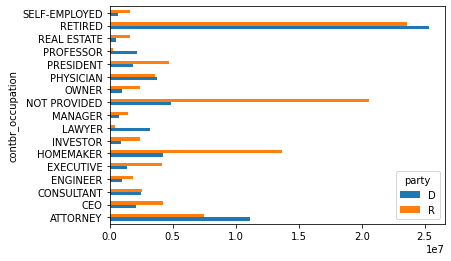

In [128]:
over_2mm.plot(kind='barh')

In [129]:
def get_top_amounts(group, key, n=5):
    totals = group.groupby(key)['contb_receipt_amt'].sum()
    
    return totals.sort_values(ascending=False)[-n:]

In [131]:
grouped = fec_mrbo.groupby('cand_nm')

grouped.apply(get_top_amounts, 'contbr_occupation', n=7)

cand_nm        contbr_occupation                     
Obama, Barack  COMPUTER ASSISTANT                        3.0
               SR MGR                                    3.0
               ADMINISTRATION/INSTRUCTOR                 3.0
               LAN/WAN ANALYST                           3.0
               LEAD UI/UX DEVELOPER                      3.0
               SPRINKLER FITTER FIRE PROTECTION SPECI    3.0
               POLICY/ LAWYER                            3.0
Romney, Mitt   SCOTT GREENBAUM                           5.0
               CHICKEN GRADER                            5.0
               INDEPENDENT PROFESSIONAL                  3.0
               IFC CONTRACTING SOLUTIONS                 3.0
               REMODELER & SEMI RETIRED                  3.0
               AFFORDABLE REAL ESTATE DEVELOPER          3.0
               3RD GENERATION FAMILY BUSINESS OWNER      3.0
Name: contb_receipt_amt, dtype: float64

In [132]:
grouped = fec_mrbo.groupby('cand_nm')

grouped.apply(get_top_amounts, 'contbr_occupation', n=7)

cand_nm        contbr_occupation                     
Obama, Barack  COMPUTER ASSISTANT                        3.0
               SR MGR                                    3.0
               ADMINISTRATION/INSTRUCTOR                 3.0
               LAN/WAN ANALYST                           3.0
               LEAD UI/UX DEVELOPER                      3.0
               SPRINKLER FITTER FIRE PROTECTION SPECI    3.0
               POLICY/ LAWYER                            3.0
Romney, Mitt   SCOTT GREENBAUM                           5.0
               CHICKEN GRADER                            5.0
               INDEPENDENT PROFESSIONAL                  3.0
               IFC CONTRACTING SOLUTIONS                 3.0
               REMODELER & SEMI RETIRED                  3.0
               AFFORDABLE REAL ESTATE DEVELOPER          3.0
               3RD GENERATION FAMILY BUSINESS OWNER      3.0
Name: contb_receipt_amt, dtype: float64

#### 9.5.2 기부금액

In [134]:
bins = np.array([0,1,10,100,1000,10000,100000,1000000])

labels = pd.cut(fec_mrbo.contb_receipt_amt,bins)
labels

411         (10, 100]
412       (100, 1000]
413       (100, 1000]
414         (10, 100]
415         (10, 100]
             ...     
701381      (10, 100]
701382    (100, 1000]
701383        (1, 10]
701384      (10, 100]
701385    (100, 1000]
Name: contb_receipt_amt, Length: 694282, dtype: category
Categories (7, interval[int64, right]): [(0, 1] < (1, 10] < (10, 100] < (100, 1000] < (1000, 10000] < (10000, 100000] < (100000, 1000000]]

In [136]:
grouped = fec_mrbo.groupby(['cand_nm', labels])

grouped.size().unstack(0)

cand_nm,"Obama, Barack","Romney, Mitt"
contb_receipt_amt,,
"(0, 1]",493,77
"(1, 10]",40070,3681
"(10, 100]",372280,31853
"(100, 1000]",153991,43357
"(1000, 10000]",22284,26186
"(10000, 100000]",2,1
"(100000, 1000000]",3,0


In [137]:
bucket_sums = grouped.contb_receipt_amt.sum().unstack(0)
bucket_sums

cand_nm,"Obama, Barack","Romney, Mitt"
contb_receipt_amt,,
"(0, 1]",318.24,77.00
"(1, 10]",337267.62,29819.66
"(10, 100]",20288981.41,1987783.76
"(100, 1000]",54798531.46,22363381.69
"(1000, 10000]",51753705.67,63942145.42
"(10000, 100000]",59100.00,12700.00
"(100000, 1000000]",1490683.08,0.00


In [138]:
normed_sums = bucket_sums.div(bucket_sums.sum(axis=1),axis=0)
normed_sums 

cand_nm,"Obama, Barack","Romney, Mitt"
contb_receipt_amt,,
"(0, 1]",0.805182,0.194818
"(1, 10]",0.918767,0.081233
"(10, 100]",0.910769,0.089231
"(100, 1000]",0.710176,0.289824
"(1000, 10000]",0.447326,0.552674
"(10000, 100000]",0.823120,0.176880
"(100000, 1000000]",1.000000,0.000000


<AxesSubplot:ylabel='contb_receipt_amt'>

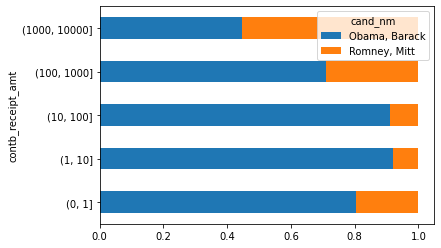

In [139]:
normed_sums[:-2].plot(kind='barh',stacked=True)

#### 9.5.3 주별 기부 통계

In [140]:
grouped = fec_mrbo.groupby(['cand_nm','contbr_st'])

totals = grouped.contb_receipt_amt.sum().unstack(0).fillna(0)

totals = totals[totals.sum(1)>100000]
totals[:10]

cand_nm,"Obama, Barack","Romney, Mitt"
contbr_st,,
AK,281840.15,86204.24
AL,543123.48,527303.51
AR,359247.28,105556.00
AZ,1506476.98,1888436.23
CA,23824984.24,11237636.60
CO,2132429.49,1506714.12
CT,2068291.26,3499475.45
DC,4373538.80,1025137.50
DE,336669.14,82712.00


In [142]:
percent = totals.div(totals.sum(1), axis=0)
percent[:4]

cand_nm,"Obama, Barack","Romney, Mitt"
contbr_st,,
AK,0.765778,0.234222
AL,0.507390,0.492610
AR,0.772902,0.227098
AZ,0.443745,0.556255
